In [40]:
import os
import sys
sys.path.insert(0, "/home/bnapp/arivkindNet/wisdrc/")
from parse_commandline import parse_commandline
from utils.imagenet_dataset import get_dataset
from utils.unprocess import *
from utils.image_utils import *
from utils.image_processing import rescale

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
parser = parse_commandline(return_parser=True)
config = parser.parse_args([])
config = vars(config)
parameters = config

In [3]:
batch_size = 8

In [4]:
generator_params = dict( n_steps=parameters['n_samples'],
                      feature_net=None, preprocessing=parameters['preprocessing'],
                        rggb_mode=0,#parameters['rggb_mode'],
                      amp=parameters['amp'], return_position_info=False, offsets = None,
                                 unprocess_high_res=parameters['unprocess_high_res'],
                        enable_random_gains=parameters['enable_random_gains'])


In [5]:
train_generator_classifier = get_dataset(parameters['dataset_dir'], 'train', batch_size, mode='low_res_with_labels',centered_offsets=False,
                                        enforce_zero_initial_offset=parameters['enforce_zero_initial_offset_cls'], **generator_params)

Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.


2022-11-11 06:13:43.450003: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1917] Ignoring visible gpu device (device: 1, name: NVIDIA GeForce GT 730, pci bus id: 0000:65:00.0, compute capability: 3.5) with core count: 2. The minimum required count is 8. You can adjust this requirement with the env var TF_MIN_GPU_MULTIPROCESSOR_COUNT.
2022-11-11 06:13:43.861101: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10247 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:17:00.0, compute capability: 6.1


debug uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu amp 4


In [6]:
generator_params['rggb_mode']=True
train_generator_classifier = get_dataset(parameters['dataset_dir'], 'train', batch_size, mode='low_res_with_labels',centered_offsets=False,
                                        enforce_zero_initial_offset=parameters['enforce_zero_initial_offset_cls'], **generator_params)

for ii,data_mosaic in enumerate(train_generator_classifier):
    if ii>0:
        break
pic_rggb = data_mosaic[0].numpy()

generator_params['rggb_mode']=False
train_generator_classifier = get_dataset(parameters['dataset_dir'], 'train', batch_size, mode='low_res_with_labels',centered_offsets=False,
                                        enforce_zero_initial_offset=parameters['enforce_zero_initial_offset_cls'], **generator_params)
for ii,data_rgb in enumerate(train_generator_classifier):
    if ii>0:
        break
pic_rgb = data_rgb[0].numpy()

debug uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu amp 4
Instructions for updating:
Use `tf.cast` instead.


2022-11-11 06:13:46.730535: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-11 06:13:56.854238: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 7442 of 8192
2022-11-11 06:13:58.084493: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


debug uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu amp 4


2022-11-11 06:14:08.547905: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 7793 of 8192
2022-11-11 06:14:08.850350: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


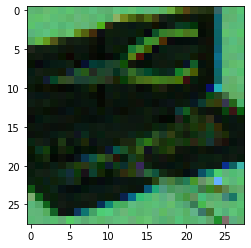

In [52]:
plt.imshow(unprocess_drc_preprocessing(rggb_to_rgb(pic_rggb))[1,2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


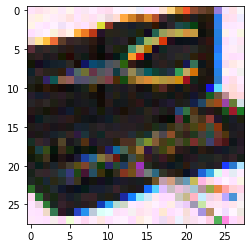

In [53]:
plt.imshow(undo_rggb_channel_gains(unprocess_drc_preprocessing(rggb_to_rgb(pic_rggb)))[1,2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


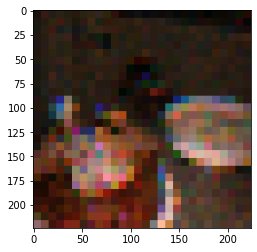

In [54]:
plt.imshow(
    unprocess_drc_preprocessing(upsample_rggb(pic_rggb[5],preprocessing='default'))[0]
)

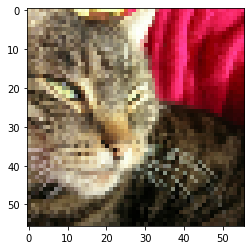

In [9]:
refpic = 0.5*(pic_rgb[0,0][:,:,[0,1,2]]+1.0)
plt.imshow(refpic)

In [27]:
ref_pic = unprocess_drc_preprocessing(pic_rgb)[1,0]

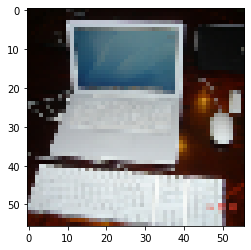

In [28]:
plt.imshow(unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={})[0].numpy())

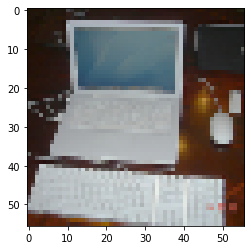

In [29]:
plt.imshow(unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={1})[0].numpy())

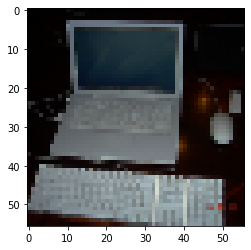

In [30]:
plt.imshow(unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={1,2})[0].numpy())

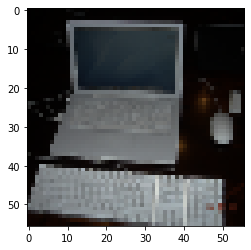

In [31]:
plt.imshow(unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={1,2,3})[0].numpy())

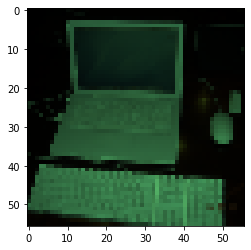

In [32]:
plt.imshow(unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={1,2,3,4})[0].numpy())

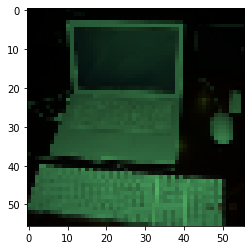

In [33]:
plt.imshow(unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={1,2,3,4,5})[0].numpy())

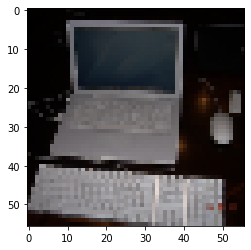

In [34]:
plt.imshow(
    undo_rggb_channel_gains(
    unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={1,2,3,4,5})[0]).numpy())

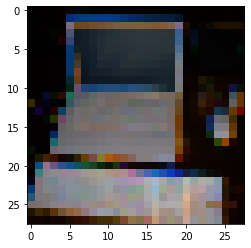

In [35]:
plt.imshow(
    rggb_to_rgb(
    mosaic(
    undo_rggb_channel_gains(
    unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={1,2,3,4,5})[0]))).numpy())

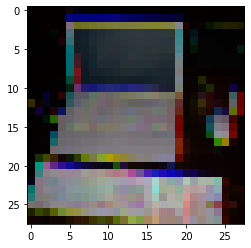

In [36]:
plt.imshow(
    mosaic(
    undo_rggb_channel_gains(
    unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={1,2,3,4,5})[0])).numpy()[...,[0,1,3]])

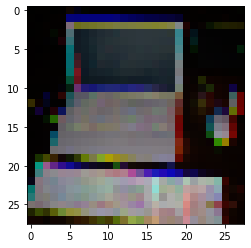

In [37]:
plt.imshow(
    mosaic(
    undo_rggb_channel_gains(
    unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={1,2,3,4,5})[0])).numpy()[...,[0,1,3]])

In [21]:
import numpy as np

In [22]:
unprocess_mobilenet_v2_preprocessing = unprocess_drc_preprocessing #the preprocessing for these two nets is equivalent

debug ssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssmobilenet


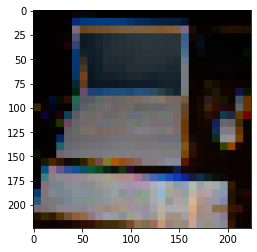

In [42]:
x = unprocess(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=True)[0][tf.newaxis,...]
x = rescale(x, preprocessing='default')
x = upsample_rggb( 
    x,
    preprocessing='keras_mobilenet_v2')
x = unprocess_mobilenet_v2_preprocessing(x)
plt.imshow(x.numpy()[0])

debug ssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssmobilenet


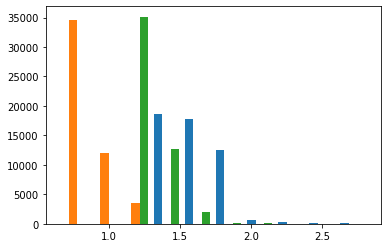

In [24]:
_ = plt.hist(unprocess_mobilenet_v2_preprocessing(
    upsample_rggb(
    unprocess(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=True)[0][tf.newaxis,...],
    preprocessing='keras_mobilenet_v2').numpy()[0]).numpy().reshape([-1,3]))

In [ ]:
_=plt.hist(unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={1,2,3,4,5})[0].numpy().reshape([-1,3]))

In [ ]:
_=plt.hist(unprocess_debug(
    tf.convert_to_tensor(ref_pic),
    do_mosaic=False,
    unprocess_steps={})[0].numpy().reshape([-1,3]))